In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline
from keras.preprocessing.text import Tokenizer
import tensorflow as tf
from keras.metrics import Recall

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
df= pd.read_csv("./myDataset.csv", encoding='utf-16')

In [5]:
df.head()

,sentence,type
0,a,1
1,a',1
2,a' --,1
3,a' or 1 = 1; --,1
4,@,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18900 entries, 0 to 18899
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  18880 non-null  object
 1   type      18900 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 295.4+ KB


In [7]:
df.dropna(inplace=True)

Text(0.5, 1.0, 'Number of malicious and benign queries')

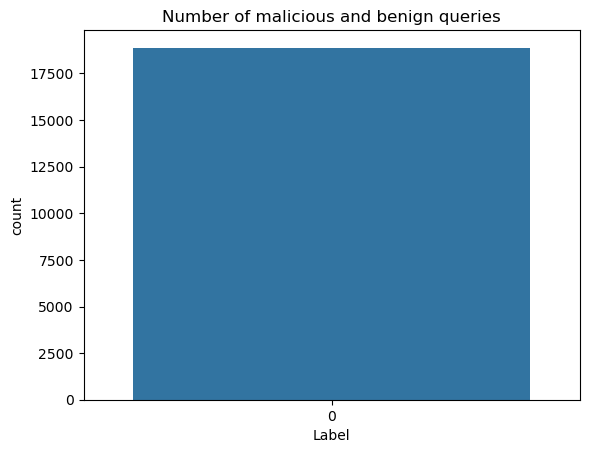

In [8]:
sns.countplot(df.type)
plt.xlabel('Label')
plt.title('Number of malicious and benign queries')


In [9]:
X=df['sentence']
y=df['type']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
#dataPreprocessing 

In [12]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [13]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [14]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=[Recall()])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257   

In [15]:
model.fit(sequences_matrix,y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
95/95 [==============================] - 10s 93ms/step - loss: 0.1921 - recall: 0.9813 - val_loss: 0.0435 - val_recall: 0.9926
Epoch 2/10
95/95 [==============================] - 9s 93ms/step - loss: 0.0287 - recall: 0.9943 - val_loss: 0.0306 - val_recall: 0.9974
Epoch 3/10
95/95 [==============================] - 9s 95ms/step - loss: 0.0190 - recall: 0.9960 - val_loss: 0.0223 - val_recall: 0.9957
Epoch 4/10
95/95 [==============================] - 9s 95ms/step - loss: 0.0142 - recall: 0.9963 - val_loss: 0.0180 - val_recall: 0.9957
Epoch 5/10
95/95 [==============================] - 9s 95ms/step - loss: 0.0125 - recall: 0.9969 - val_loss: 0.0177 - val_recall: 0.9965
Epoch 6/10
95/95 [==============================] - 9s 96ms/step - loss: 0.0108 - recall: 0.9971 - val_loss: 0.0219 - val_recall: 0.9974


In [16]:
X_test_sequences = tok.texts_to_sequences(X_test)
X_test_sequences_matrix = sequence.pad_sequences(X_test_sequences,maxlen=max_len)


In [17]:
recall = model.evaluate(X_test_sequences_matrix,y_test)

118/118 [==============================] - 1s 8ms/step - loss: 0.0238 - recall: 0.9966


In [18]:
print('Test set\n Loss: {:0.3f}\n Recall: {:0.3f}'.format(recall[0],recall[1]))

Test set
 Loss: 0.024
 Recall: 0.997


In [19]:
y_pred=model.predict(X_test_sequences_matrix)

118/118 [==============================] - 1s 9ms/step


In [20]:
print(y_pred)

[[9.9756247e-01]
 [9.9999994e-01]
 [4.0193013e-06]
 ...
 [9.9549532e-01]
 [9.9998993e-01]
 [9.9960226e-01]]


In [21]:
for i in range(len(y_pred)):
    if y_pred[i]>0.5:
        y_pred[i]=1
    elif y_pred[i]<=0.5:
        y_pred[i]=0

In [22]:
print(y_pred)

[[1.]
 [1.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


In [23]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
confusion_matrix(y_test, y_pred)
plt.show()
accuracy= accuracy_score(y_test, y_pred)
precision= precision_score(y_test, y_pred, zero_division=1)
recall= recall_score(y_test, y_pred, zero_division=1)
print(" Accuracy : {0} \n Precision : {1} \n Recall : {2}".format(accuracy, precision, recall))

 Accuracy : 0.9944385593220338 
 Precision : 0.9962186318322448 
 Recall : 0.9965612104539202


In [24]:
from keras.models import load_model
from pathlib import Path

model.save_weights("lstm_weights.h5")
print('done')

model.save('lstm_model.h5')

done


/Users/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
loaded_model = tf.keras.models.load_model('lstm_model.h5')
loaded_model.load_weights('lstm_weights.h5')

In [26]:
def clean_data(input_val):

    txts = tok.texts_to_sequences(input_val)
    input_val = sequence.pad_sequences(txts, maxlen=max_len)

    return input_val


def predict_sqli_attack():
    
    repeat=True
    
    space=''
    for i in range(20):
        space+= "-"

    print(space) 
    input_val=input("Please enter some data: ")
    print(space)

    
    if input_val== '0':
        repeat=False
    
    sample_texts_list = []
    sample_texts_list.append(input_val)
    txts = tok.texts_to_sequences(sample_texts_list)
    txts = sequence.pad_sequences(txts, maxlen=max_len)

    result=loaded_model.predict(txts)
    print(result)


    print(space)
    
    
    if repeat == True:
            if result > 0.5:
                 print("ALERT! This can be SQL injection")
            elif result <= 0.5:
                 print("It seems to be a benign")
            
            print(space)
        
            predict_sqli_attack()
            
    elif repeat == False:
        print( " Closing ")
        

In [27]:
predict_sqli_attack()

--------------------
Please enter some data: hello
--------------------
1/1 [==============================] - 0s 159ms/step
[[0.24355486]]
--------------------
It seems to be a benign
--------------------
--------------------
Please enter some data: *(123
--------------------
1/1 [==============================] - 0s 21ms/step
[[0.24355486]]
--------------------
It seems to be a benign
--------------------
--------------------
Please enter some data: &(n&1: select * from users where id=1 or ($+)=1 or 1=1 -- 1
--------------------
1/1 [==============================] - 0s 14ms/step
[[0.99977976]]
--------------------
ALERT! This can be SQL injection
--------------------
--------------------
Please enter some data: AND (SELECT * FROM (SELECT(SLEEP(5)))nQIP)--
--------------------
1/1 [==============================] - 0s 21ms/step
[[0.99975145]]
--------------------
ALERT! This can be SQL injection
--------------------
--------------------
Please enter some data: can i take you 
-------